<a href="https://colab.research.google.com/github/ramankumar-1/mumbaihousepriceprediction/blob/main/mumbaihouseprice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #20BCE1935 Raman Kumar
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sb 
import sys
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
d1=pd.read_csv('/content/drive/MyDrive/DAC-Club/Mumbai1.csv',index_col=0)

In [ ]:
d1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6347 entries, 0 to 6346
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 6347 non-null   int64 
 1   Area                  6347 non-null   int64 
 2   Location              6347 non-null   object
 3   No. of Bedrooms       6347 non-null   int64 
 4   New/Resale            6347 non-null   int64 
 5   Gymnasium             6347 non-null   int64 
 6   Lift Available        6347 non-null   int64 
 7   Car Parking           6347 non-null   int64 
 8   Maintenance Staff     6347 non-null   int64 
 9   24x7 Security         6347 non-null   int64 
 10  Children's Play Area  6347 non-null   int64 
 11  Clubhouse             6347 non-null   int64 
 12  Intercom              6347 non-null   int64 
 13  Landscaped Gardens    6347 non-null   int64 
 14  Indoor Games          6347 non-null   int64 
 15  Gas Connection        6347 non-null   

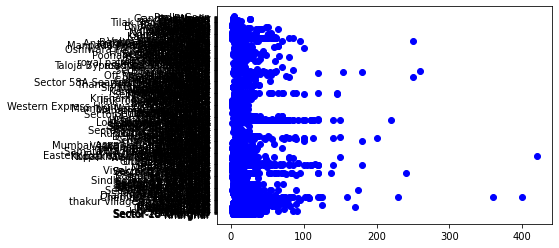

In [ ]:
plt.scatter(d1['Price']/1000000,d1['Location'],c='blue')

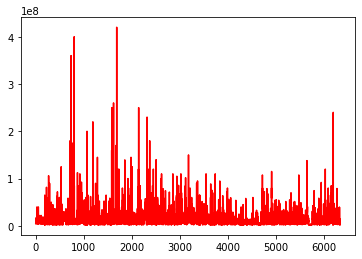

In [ ]:
d1['Price'].plot(color='red')

In [ ]:
print(min(d1['Price']))
print(max(d1['Price']))

2000000
420000000


In [ ]:
d1_bin=d1[['Area','Price']]
d1_bin

,Area,Price
0,720,4850000
1,600,4500000
2,650,6700000
3,650,4500000
4,665,5000000
...,...,...
6342,700,2485000
6343,900,14500000
6344,900,14500000
6345,1380,4100000


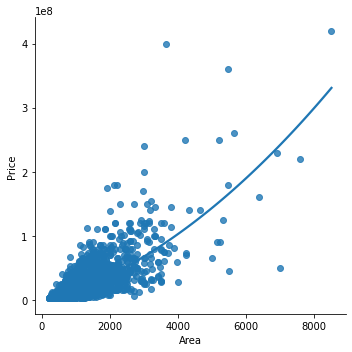

In [ ]:
sb.lmplot(x="Area",y="Price",data=d1_bin,order=2,ci=None) #Plotting relation between Area & Price (Data Scatter)

In [ ]:
d1_bin.fillna(method ='ffill', inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
x = np.array(d1_bin['Area']).reshape(-1, 1)
y = np.array(d1_bin['Price']).reshape(-1, 1)
  
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
d1_bin.dropna(inplace = True)
  
# Dropping any rows with Nan values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
  
# Splitting the data into training and testing data
regr = LinearRegression()
  
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test)) #Printing the Score of Regression

0.5594478075120956


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


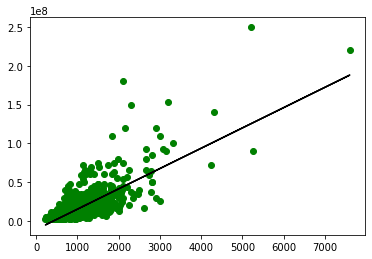

In [ ]:
y_pred = regr.predict(x_test)
plt.scatter(x_test, y_test, color ='g')
plt.plot(x_test, y_pred, color ='k')
  
plt.show()

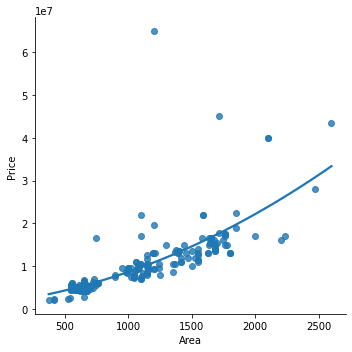

In [ ]:
d1_binSmaller = d1_bin[:][:200]
# Selecting the 1st 200 rows of the data
sb.lmplot(x ="Area", y ="Price", data = d1_binSmaller,order = 2, ci = None)

In [ ]:
d1_binSmaller.fillna(method ='ffill', inplace = True)  
X = np.array(d1_binSmaller['Area']).reshape(-1, 1)
y = np.array(d1_binSmaller['Price']).reshape(-1, 1)
  
d1_binSmaller.dropna(inplace = True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
  
regr = LinearRegression()
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test)) #Printing the Score of Regression

0.7755938292581839


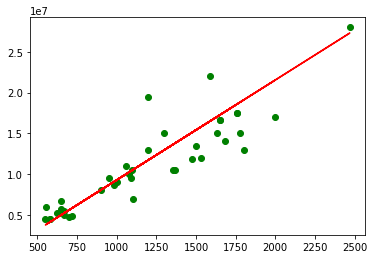

In [ ]:
y_pred = regr.predict(x_test)
plt.scatter(x_test, y_test, color ='g')
plt.plot(x_test, y_pred, color ='r')
plt.show()